<a href="https://colab.research.google.com/github/allielabrecque4-debug/Machine-Learning-Labrecque/blob/main/Class5_Participation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
import pandas as pd

csv_path = '/content/drive/MyDrive/class6plot.csv'
try:
  df = pd.read_csv(csv_path)
  print("CSV file loaded successfully!")
  display(df.head())
except FileNotFoundError:
  print(f"Error: The file was not found at {csv_path}")
except Exception as e:
  print(f"An error occurred: {e}")

CSV file loaded successfully!


,x,y
0,8.905134e+03,60.226418
1,1.756323e+03,80.754718
2,2.405996e+03,81.509433
3,3.640410e+07,32.603778
4,3.701219e+07,39.547170


In [22]:
df

,x,y
0,8.905134e+03,60.226418
1,1.756323e+03,80.754718
2,2.405996e+03,81.509433
3,3.640410e+07,32.603778
4,3.701219e+07,39.547170
...,...,...
56,3.033992e+03,80.905660
57,3.954778e+03,81.358491
58,5.885509e+03,81.207548
59,4.515193e+03,81.056603


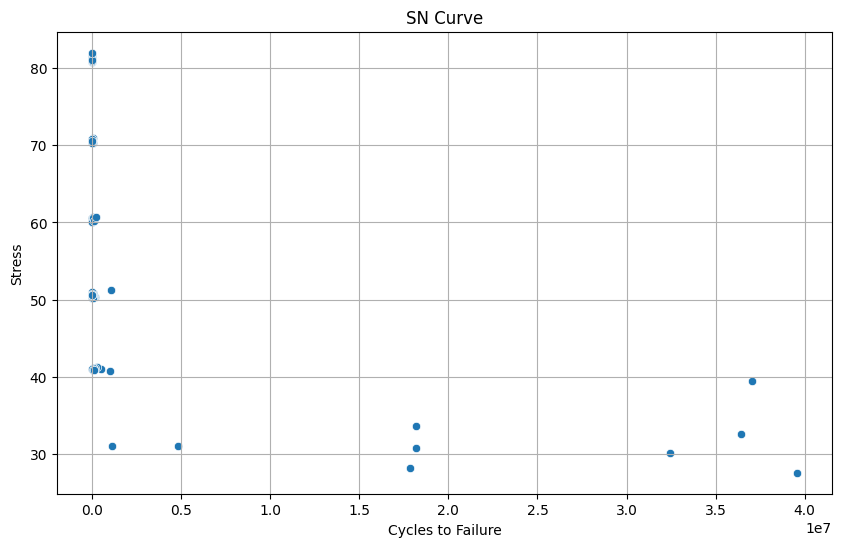

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y=df.columns[1])
plt.title('SN Curve')
plt.xlabel('Cycles to Failure')
plt.ylabel('Stress')
plt.grid(True)
plt.show()

0.8064516129032258
[[25  0]
 [ 6  0]]


Text(0, 0.5, 'Stress')

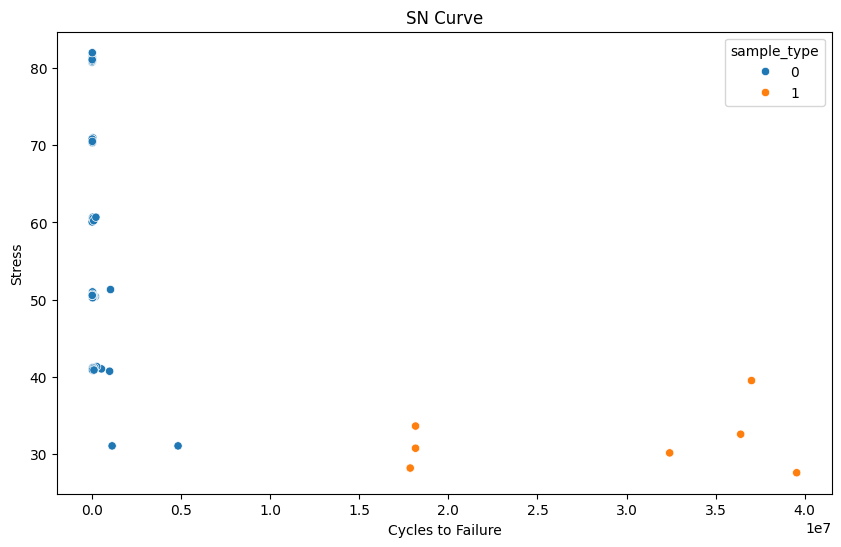

In [24]:
# class partiipation 6 - KNN
# features: x = cycles to failure, y = stress

df['sample_type']=0
df.loc[df['x']>10**7, 'sample_type'] =1

X = df[['x',' y']].to_numpy()
y_target = df['sample_type'].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.5, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

knn.score(X_test, y_test)

knn.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y=' y', hue='sample_type')
plt.title('SN Curve')
plt.xlabel('Cycles to Failure')
plt.ylabel('Stress')